# Imports

In [1]:
import json
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Data Query

In [2]:
# Load your PostgreSQL credential to `database_creds`
database_creds_file = open('./database_cred.json', 'r')
database_creds = json.loads(database_creds_file.read())

In [3]:
# Sign into your database
engine = db.create_engine(database_creds['url'])

connection = engine.connect()
metadata = db.MetaData()

In [4]:
sql = """
SELECT *
FROM ny_dhs_weekly
"""

weekly_df = pd.read_sql_query(sql, engine)

In [5]:
weekly_df = weekly_df.set_index('date_of_census')

In [6]:
weekly_df.head()

,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_single_adults_in_shelter,families_with_children_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,adult_families_in_shelter,individuals_in_adult_families_in_shelter
date_of_census,,,,,,,,,,,,
2019-12-01,38273,21709,59982,12128,4590,16719,12195,16308,21709,38017,2492,5245
2019-11-24,38490,21801,60292,12251,4613,16864,12230,16361,21801,38163,2499,5264
2019-11-17,38533,21885,60419,12178,4616,16794,12265,16425,21885,38311,2523,5313
2019-11-10,38291,21797,60089,12072,4551,16623,12213,16347,21797,38144,2523,5320
2019-11-03,38242,21747,59989,12013,4556,16570,12205,16342,21747,38089,2526,5329


# Exploratory Data Anaysis (EDA)

---

### 1. Children and Adult Ratio

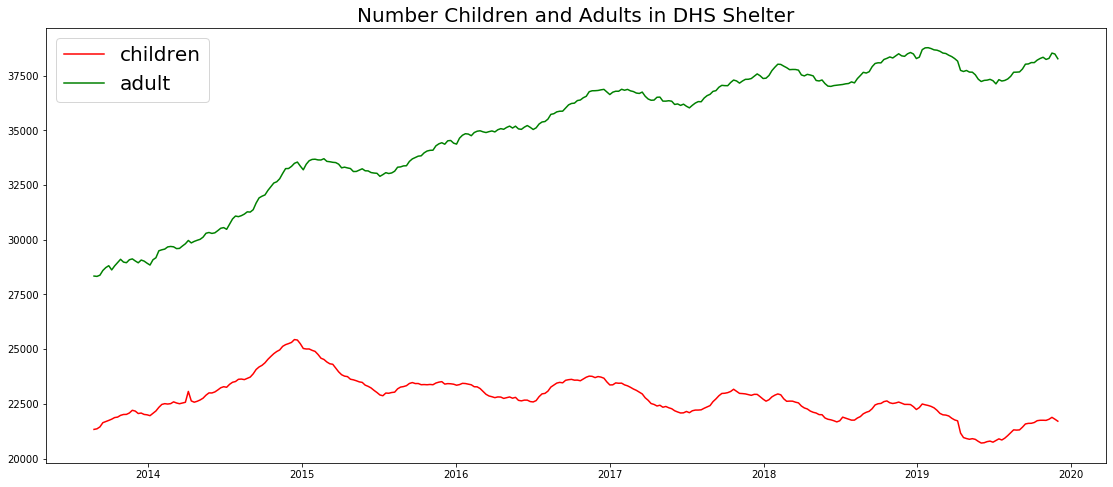

In [7]:
plt.figure(figsize = (19, 8))
plt.plot(weekly_df['total_children_in_shelter'],color = 'red', label = 'children')
plt.plot(weekly_df['total_adults_in_shelter'],color = 'green', label = 'adult')
plt.title('Number Children and Adults in DHS Shelter', fontsize = 20)
plt.legend(fontsize = 20)

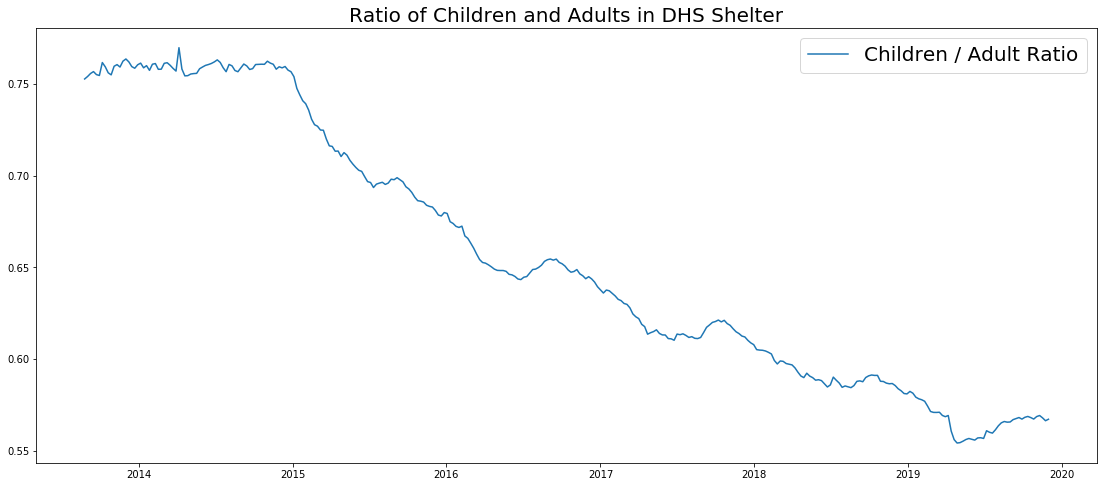

In [8]:
plt.figure(figsize = (19, 8))
plt.plot(weekly_df['total_children_in_shelter'] / weekly_df['total_adults_in_shelter'],\
         label = 'Children / Adult Ratio')
plt.title('Ratio of Children and Adults in DHS Shelter', fontsize = 20)
plt.legend(fontsize = 20)

**Observations** (Children and Adult Ratio)
- The children to adult ratio has been decreasing with a slight seasonality.


### 2. Women and Men Ratio

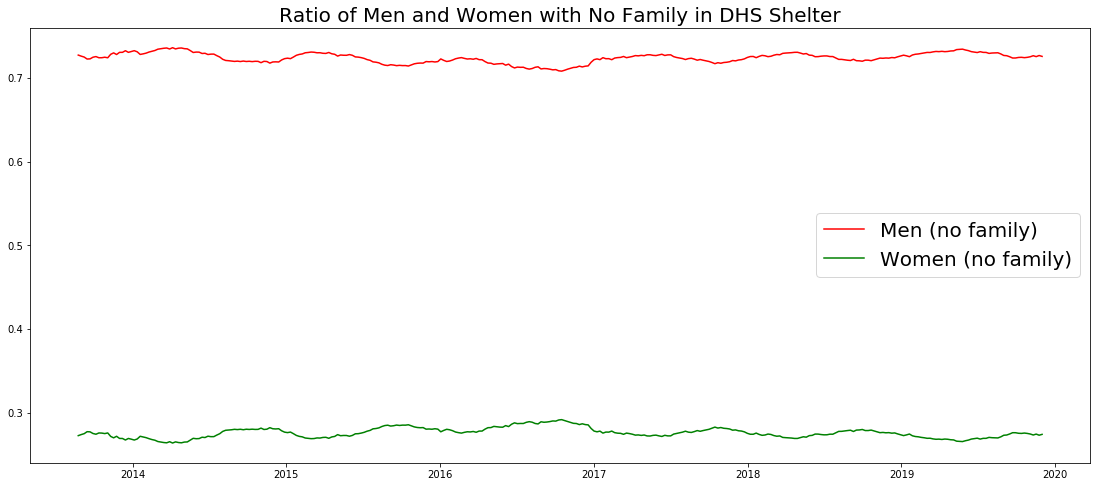

In [9]:
plt.figure(figsize = (19, 8))

plt.plot(weekly_df['single_adult_men_in_shelter'] / weekly_df['total_single_adults_in_shelter'],
         color = 'red', label = 'Men (no family)')
plt.plot(weekly_df['single_adult_women_in_shelter']/ weekly_df['total_single_adults_in_shelter']
         ,color = 'green', label = 'Women (no family)')
plt.title('Ratio of Men and Women with No Family in DHS Shelter', fontsize = 20)
plt.legend(fontsize = 20)

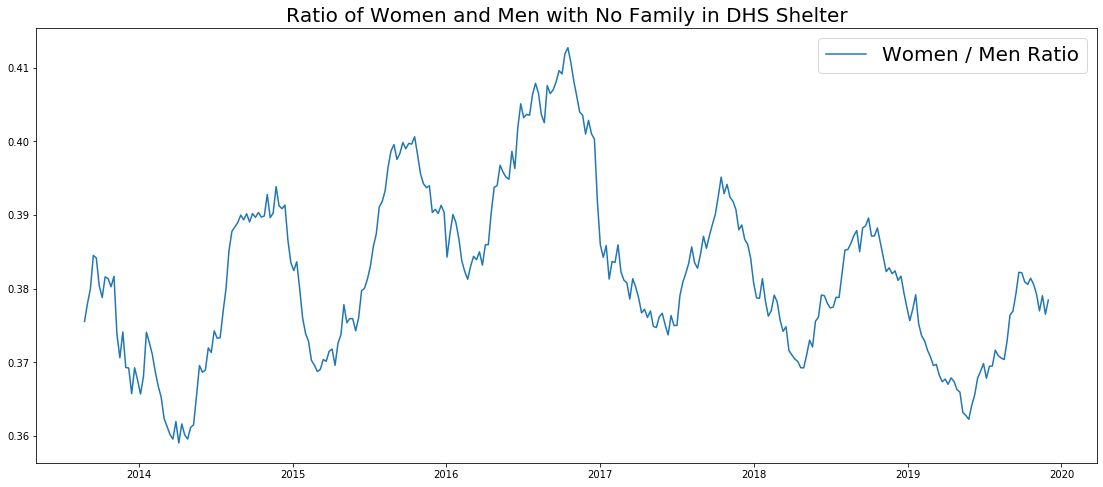

In [10]:
plt.figure(figsize = (19, 8))

plt.plot(weekly_df['single_adult_women_in_shelter']/weekly_df['single_adult_men_in_shelter'], label = 'Women / Men Ratio')

plt.title('Ratio of Women and Men with No Family in DHS Shelter', fontsize = 20)
plt.legend(fontsize = 20)

**Observations** (Women and Men Ratio)                  
- The women to men ratio does not seem to have a strong trend but has a strong seasonality.

### 3. Ratio of Individuals Sheltered with Family  and without Family

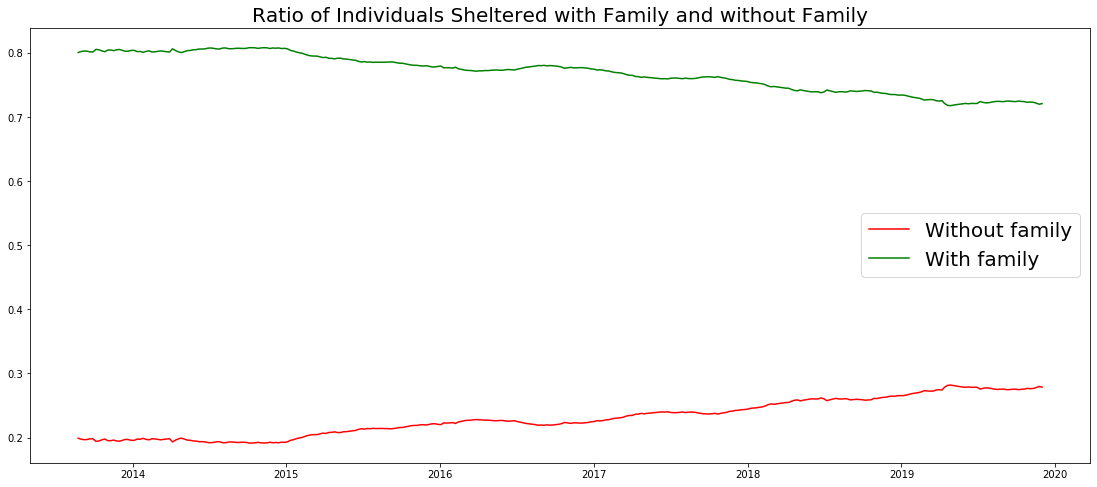

In [11]:
plt.figure(figsize = (19, 8))
plt.plot(weekly_df['total_single_adults_in_shelter'] / weekly_df['total_individuals_in_shelter'],
         color = 'red', label = 'Without family')
plt.plot((weekly_df['total_individuals_in_families_with_children_in_shelter_']\
          + weekly_df['individuals_in_adult_families_in_shelter'])/ weekly_df['total_individuals_in_shelter']
         ,color = 'green', label = 'With family')
plt.title('Ratio of Individuals Sheltered with Family and without Family', fontsize = 20)
plt.legend(fontsize = 20)

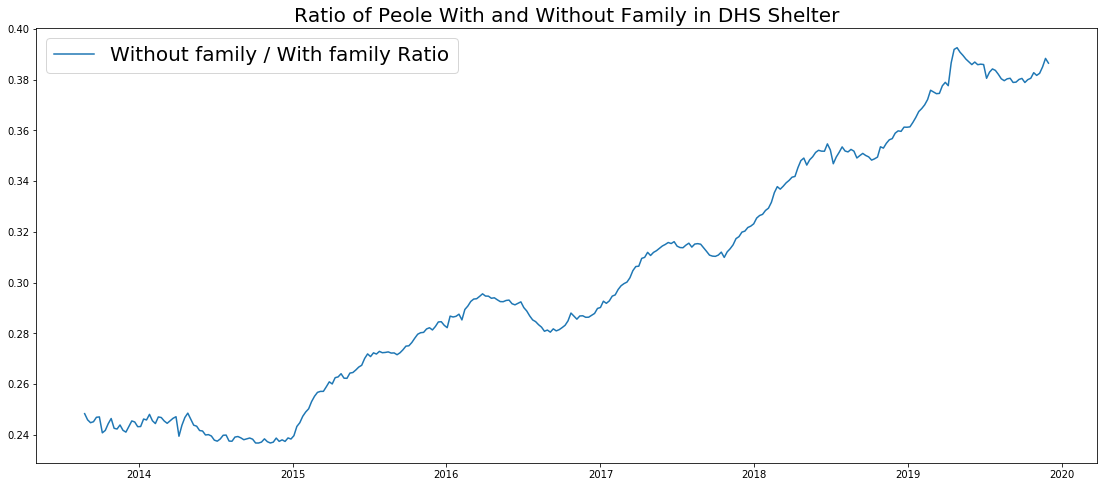

In [12]:
plt.figure(figsize = (19, 8))
plt.plot(weekly_df['total_single_adults_in_shelter']\
         /(weekly_df['total_individuals_in_families_with_children_in_shelter_']\
          + weekly_df['individuals_in_adult_families_in_shelter']),
         label = 'Without family / With family Ratio')
plt.title('Ratio of Peole With and Without Family in DHS Shelter', fontsize = 20)
plt.legend(fontsize = 20)

**Observations** (Ratio of Peole With and Without Family in DHS Shelter)                  
- The women to men ratio does not seem to have a strong trend but has a strong seasonality.